In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:/Users/ASUS/Downloads/Airline+Passenger+Satisfaction/airline_passenger_satisfaction.csv")

In [6]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [15]:
cat_var = list(data.select_dtypes("object").columns)
cat_var

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [16]:
len(cat_var)

5

In [18]:
num_var = list(data.select_dtypes("number").columns)
num_var

['ID',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [19]:
len(num_var)

19

## We can see there are 19 numerical variables and 5 categorical variables. Lets investigate missing values

In [21]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

Lets investigate the "Arrival Delay" column further in order to deal with it (drop or imput). 
My guess is the "Arrival Delay" should correlate with the "Depature Delay"

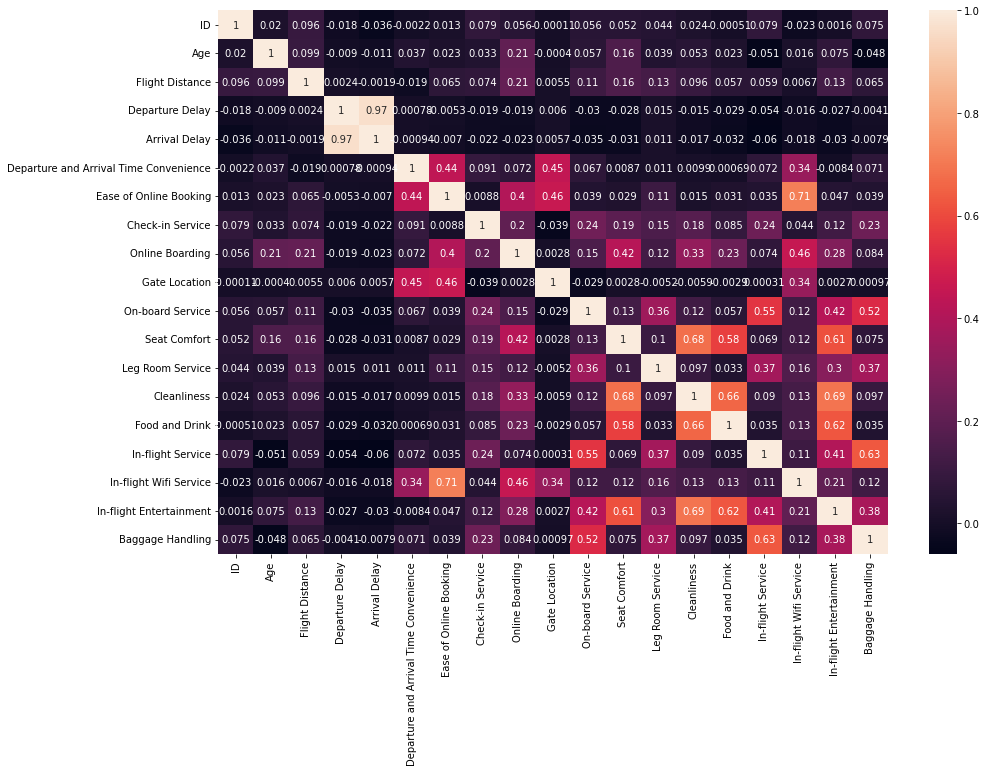

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True);

As guessed, "Arrival Delay" and "Depature Delay" are highly correlated at 0.97. Lets investigate further

In [44]:
data[["Departure Delay", "Arrival Delay"]].describe()

,Departure Delay,Arrival Delay
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


We can see the metrics of both dimensions are almost same which is evident why correlation is 0.97. Now, we can replace the missing values of "Arrival Delay" with the equivalent value of "Departure Delay"

In [46]:
data["Arrival Delay"] = data["Arrival Delay"].fillna(data["Departure Delay"])

In [49]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Lets investigate all numerical variuables based on their correlation coefficient

<AxesSubplot:>

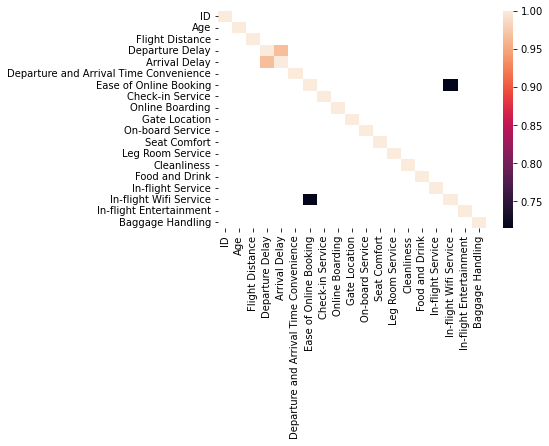

In [57]:
# 0.7 - 1.0 is Very strong and Positive correlation

sns.heatmap(data.corr()[data.corr() > 0.7])

<AxesSubplot:>

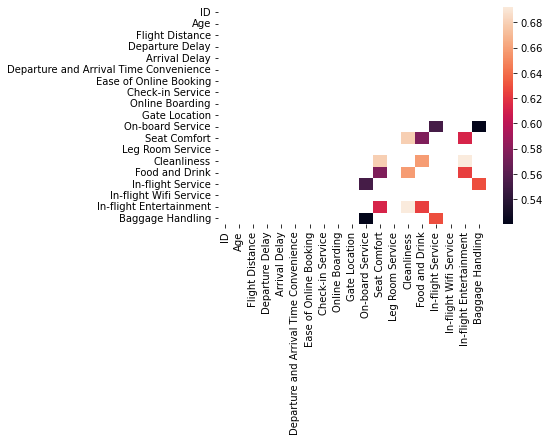

In [63]:
# 0.5 - 0.7 is strong and Positive correlation

sns.heatmap(data.corr()[(data.corr() > 0.5) & (data.corr() <= 0.7)])

<AxesSubplot:>

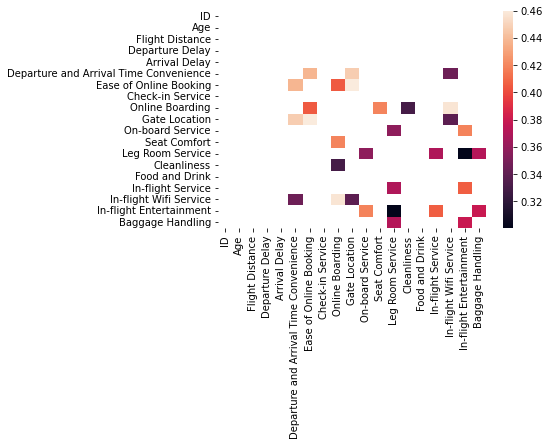

In [64]:
# 0.3 - 0.5 is moderate and Positive correlation

sns.heatmap(data.corr()[(data.corr() > 0.3) & (data.corr() <= 0.5)])